LINEAR REGRESSION
=> create model
=> predict price(based on existing features)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('USA_Housing.csv')

In [4]:
df.info() #to check missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.drop('Address', axis=1,  inplace=True) #delete the catagorical column

In [8]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

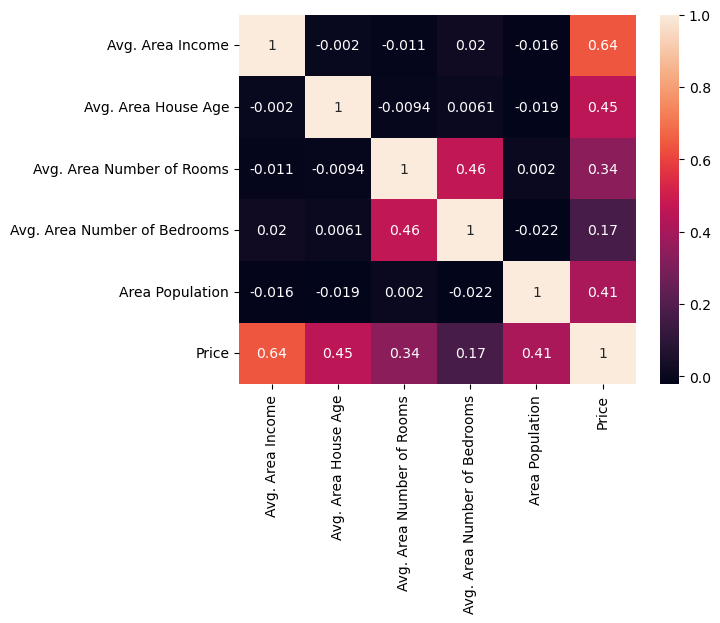

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [12]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1522,67716.748222,6.431119,7.753989,5.28,40562.188948
835,78095.352630,6.837193,7.119862,3.00,32346.434992
358,55577.071754,6.533916,7.162536,3.47,19560.012414
138,63876.059910,7.080219,7.187433,3.37,38052.876443
299,52188.118727,5.636892,5.807401,4.03,42495.754677
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [16]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
908,80000.764172,5.612802,5.910013,3.17,42245.446401
2114,68450.343795,6.829171,6.459429,2.38,32147.638435
3896,58318.861500,6.643226,7.028824,4.29,29491.635273
1627,78866.665247,6.331005,6.834236,3.44,39816.749113


In [17]:
y_train

1522    1.535782e+06
835     1.538923e+06
358     8.180579e+05
138     1.388530e+06
299     7.838084e+05
            ...     
4426    1.023944e+06
466     1.223101e+06
3092    1.318598e+06
3772    1.708631e+06
860     1.060898e+06
Name: Price, Length: 3350, dtype: float64

In [18]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
908     1.383967e+06
2114    1.203090e+06
3896    8.592087e+05
1627    1.509423e+06
2873    9.987020e+05
Name: Price, Length: 1650, dtype: float64

MODEL CREATION

In [20]:
    from sklearn.linear_model import LinearRegression

In [21]:
lm= LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
prediction=lm.predict(X_test)

Text(0.5, 1.0, 'Scatter plot of Actual vs Predicted')

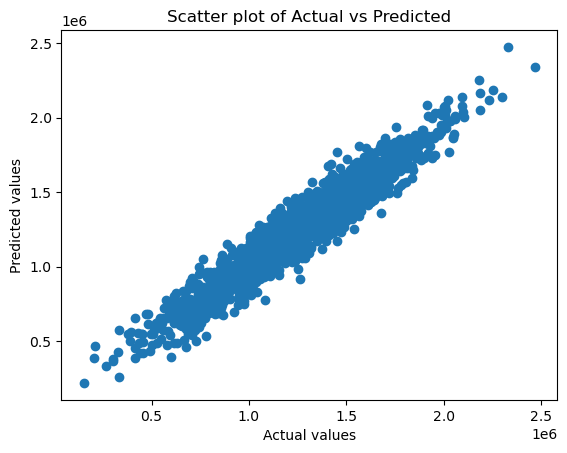

In [35]:
plt.scatter(y_test, prediction)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of Actual vs Predicted")

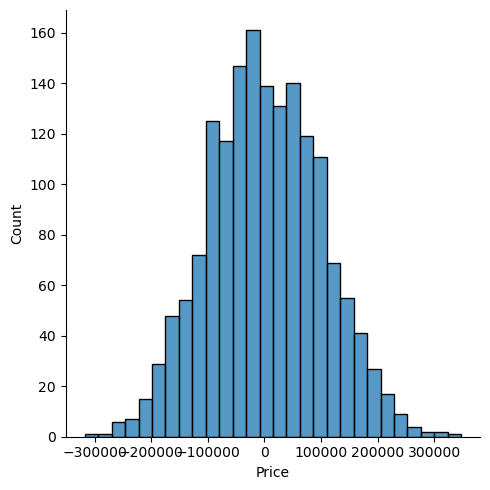

In [39]:
sns.displot((y_test-prediction))

EVLUATION
>MEAN ABSOLUTE ERROR
>MEAN SQUERED ERROR
>ROOT MEAN SQUERED ERROR

In [43]:
from sklearn import metrics

In [47]:
metrics.mean_absolute_error(y_test, prediction)

80893.8119076996

In [51]:
metrics.mean_squared_error(y_test, prediction)

10013679978.582317

In [53]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

100068.37651617177